# Data Science Project
## I'll be doing a machine learning Algorithm on sales dataset
###  Date: 1/02/2021

### let me import all necessary tools and packages to work with

In [ ]:
# trying to create a virtual enevironment for my project
#virtualenv feb_project

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime

%matplotlib inline

##### check their version and record it for easy maintainace by another engineer.

In [3]:
#print('Matplotlib Version: {}'.format(plt.__version__))
print('Numpy Version: {}'.format(np.__version__))
print('Pandas Version: {}'.format(pd.__version__))
print('Seaborn Version: {}'.format(sns.__version__))

Numpy Version: 1.19.2
Pandas Version: 1.1.3
Seaborn Version: 0.11.0


## fetching up my dataset

In [4]:
df = pd.read_csv('./market.csv', index_col=0)
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
df.tail()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [6]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [7]:
df.shape

(1000, 16)

In [8]:
df.index

Index(['750-67-8428', '226-31-3081', '631-41-3108', '123-19-1176',
       '373-73-7910', '699-14-3026', '355-53-5943', '315-22-5665',
       '665-32-9167', '692-92-5582',
       ...
       '886-18-2897', '602-16-6955', '745-74-0715', '690-01-6631',
       '652-49-6720', '233-67-5758', '303-96-2227', '727-02-1313',
       '347-56-2442', '849-09-3807'],
      dtype='object', name='Invoice ID', length=1000)

In [9]:
df.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment',
       'cogs', 'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 750-67-8428 to 849-09-3807
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross margin percentage  1000 non-null   float64
 14  gross income

# explain what you just did up ontil now

##### I just checked some basic information about the datset and these are the ones I did
* head this help me see my datset in tabular format showing maximum of 5 first rows
* tail this help me see my datset in tabular format showing maximum of 5 last rows
* describe this help me see my datset in tabular format showing  rows and columns of mean, median and mode information
* info this help me see my datset  format showing rows and columns of the column names their data type and also their values
* shape this help me see my dataset in the total number of  rows and clumns

# Now let's try clearing our datasets

In [11]:
df.isna().head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
750-67-8428,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
226-31-3081,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
631-41-3108,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
123-19-1176,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
373-73-7910,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().isna().sum()

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

# my dataset does not conatin null or any missing values, but I noticed that there are some things that are not too clean 

## you don't like the way the date is being numbered here, let's check

In [13]:
df.head(1)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1


In [14]:
# df_date = df['Date']

# for i in df_date:
#     print(i)

In [15]:
df['Date'].head(10)

Invoice ID
750-67-8428     1/5/2019
226-31-3081     3/8/2019
631-41-3108     3/3/2019
123-19-1176    1/27/2019
373-73-7910     2/8/2019
699-14-3026    3/25/2019
355-53-5943    2/25/2019
315-22-5665    2/24/2019
665-32-9167    1/10/2019
692-92-5582    2/20/2019
Name: Date, dtype: object

In [16]:
df['Date'] = pd.to_datetime(df.Date)

In [17]:
df['Date'].head(5)

Invoice ID
750-67-8428   2019-01-05
226-31-3081   2019-03-08
631-41-3108   2019-03-03
123-19-1176   2019-01-27
373-73-7910   2019-02-08
Name: Date, dtype: datetime64[ns]

In [18]:
df.head(10)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3
699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,2019-03-25,18:30,Ewallet,597.73,4.761905,29.8865,4.1
355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2019-02-25,14:36,Ewallet,413.04,4.761905,20.6520,5.8
315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2019-02-24,11:38,Ewallet,735.60,4.761905,36.7800,8.0
665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,2019-01-10,17:15,Credit card,72.52,4.761905,3.6260,7.2


## the way the date format was, was kinda confusing some I changed it to year/month/day format for easy readability

/home/tonye/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


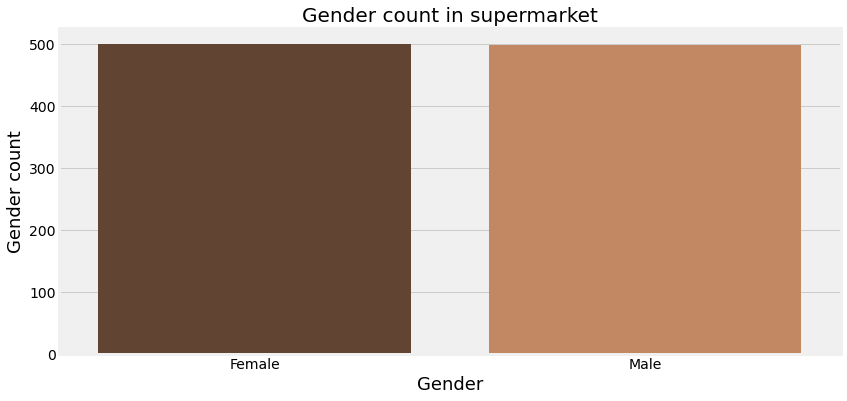

In [19]:
Gender = df['Gender']
plt.figure(figsize=(14,6))
plt.style.use('fivethirtyeight')
ax= sns.countplot(Gender, palette = 'copper')
ax.set_xlabel(xlabel= "Gender",fontsize=18)
ax.set_ylabel(ylabel = "Gender count", fontsize = 18)
ax.set_title(label = "Gender count in supermarket", fontsize = 20)
plt.show()

### is it possible to get equal percentage of gender patronizing a store? not sure about that, so let's see our numeric values of the 'Gender' column

In [20]:
ch_gender = df.groupby(['Gender']).agg({'Total':'sum'})

In [21]:
display(ch_gender)

,Total
Gender,
Female,167882.925
Male,155083.824


In [22]:
df.head(2)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6


/home/tonye/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


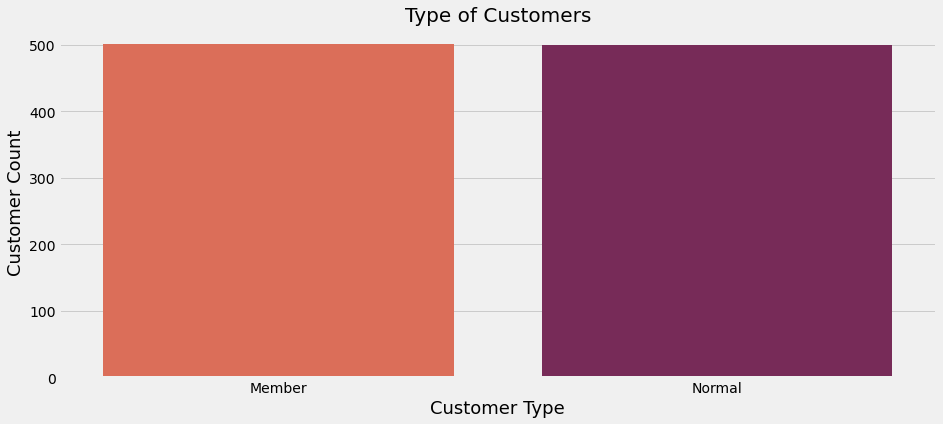

In [23]:
Customer = df['Customer type']
plt.figure(figsize=(14,6))
plt.style.use('fivethirtyeight')
ax= sns.countplot(Customer, palette = 'rocket_r')
ax.set_xlabel(xlabel= "Customer Type",fontsize=18)
ax.set_ylabel(ylabel = "Customer Count", fontsize = 18)
ax.set_title(label = "Type of Customers", fontsize = 20)
plt.show()

# I was having errors when trying to plot my graphs using the instructor's code, but what I did was to assign the 'Customer type' column to a new variable and use my old code where I deleted the data=data function, cause I really don't understands what it does. But immediately I did that, I got a nice graph

#### Now our graphs looks as if they are of equal parts, what I mean is the values in the Customer type column, so let's see it in figures and not in graph anymore to compare.

In [24]:
customer = df.groupby(['Customer type']).agg({'Total':'sum'})
customer

,Total
Customer type,
Member,164223.444
Normal,158743.305


In [25]:
df['Customer type'].head(2)

Invoice ID
750-67-8428    Member
226-31-3081    Normal
Name: Customer type, dtype: object

##### let me check my dataset first

In [26]:
df.head(3)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4


In [27]:
# df['Customer type'].head()

/home/tonye/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


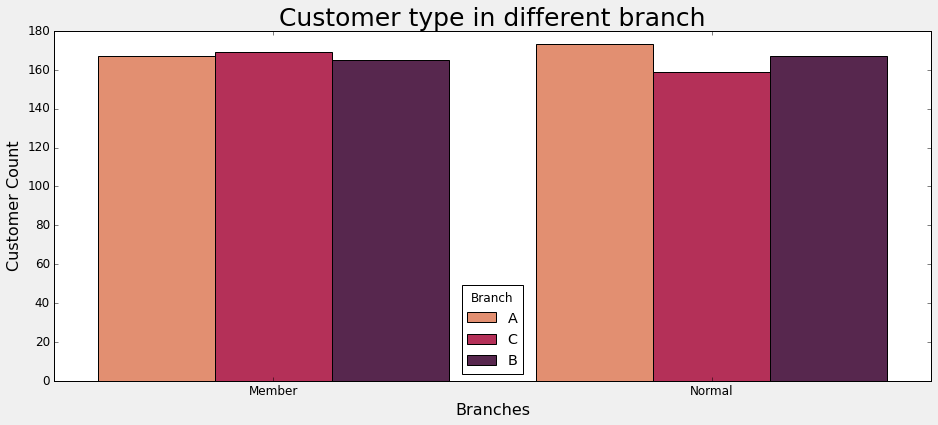

In [28]:
Branch = df['Branch']
Customer = df['Customer type']

plt.figure(figsize=(14,6))
plt.style.use('classic')
ax = sns.countplot(Customer, hue = Branch, data=df, palette='rocket_r')
ax.set_title(label = 'Customer type in different branch', fontsize=25)
ax.set_xlabel(xlabel = 'Branches', fontsize=16)
ax.set_ylabel(ylabel = 'Customer Count', fontsize=16)
plt.show()

### I noticed that when I remove the quotation on the various columns they work, I don't know why but I'll check Seaborn documentation again.

# Let's see the different payment methods use to transact on our platform

/home/tonye/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


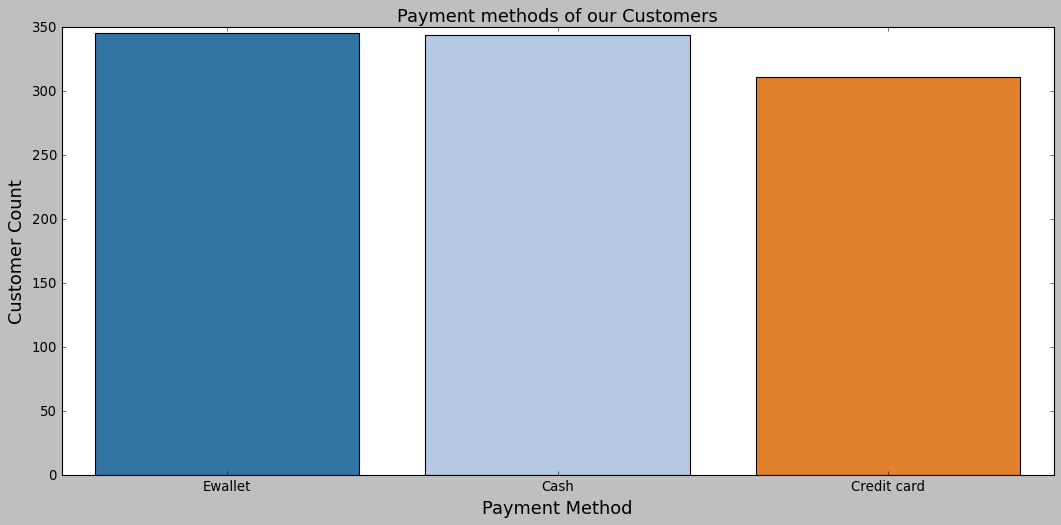

In [29]:
payment = df['Payment']

plt.figure(figsize=(16,7))
ax = sns.countplot(payment, data=df, palette='tab20')
ax.set_title(label = 'Payment methods of our Customers', fontsize=16)
ax.set_xlabel(xlabel = 'Payment Method', fontsize=16)
ax.set_ylabel(ylabel = 'Customer Count', fontsize=16)

plt.show()

# Now let's check the payment distribution in all branches 

/home/tonye/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


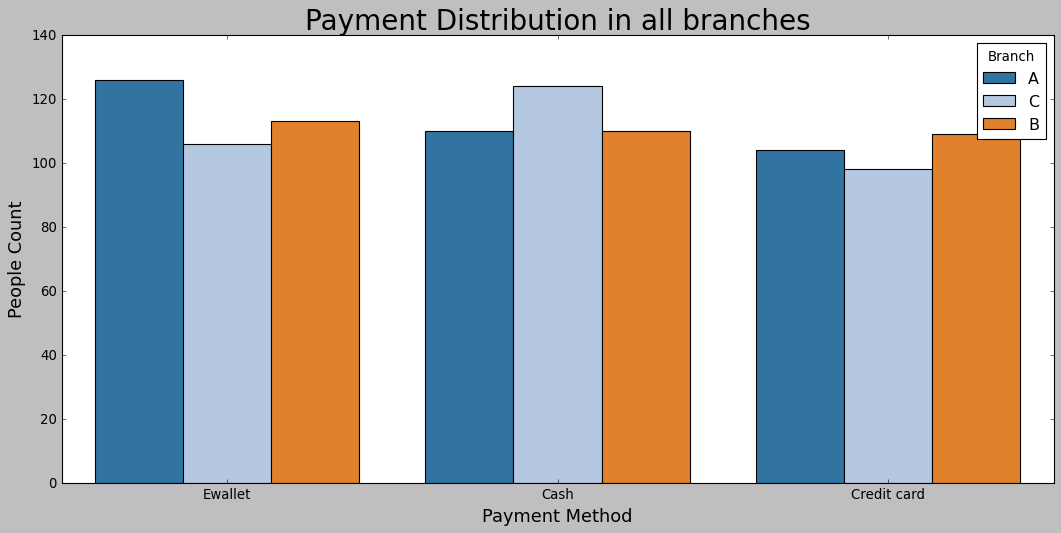

In [30]:
plt.figure(figsize=(16,7))
plt.style.use('classic')
ax = sns.countplot(payment, hue=Branch, data=df, palette='tab20')
ax.set_title(label = 'Payment Distribution in all branches', fontsize=25)
ax.set_xlabel(xlabel = 'Payment Method', fontsize=16)
ax.set_ylabel(ylabel = 'People Count', fontsize=16)
plt.show()

# Checking the rating distribution in our three branches

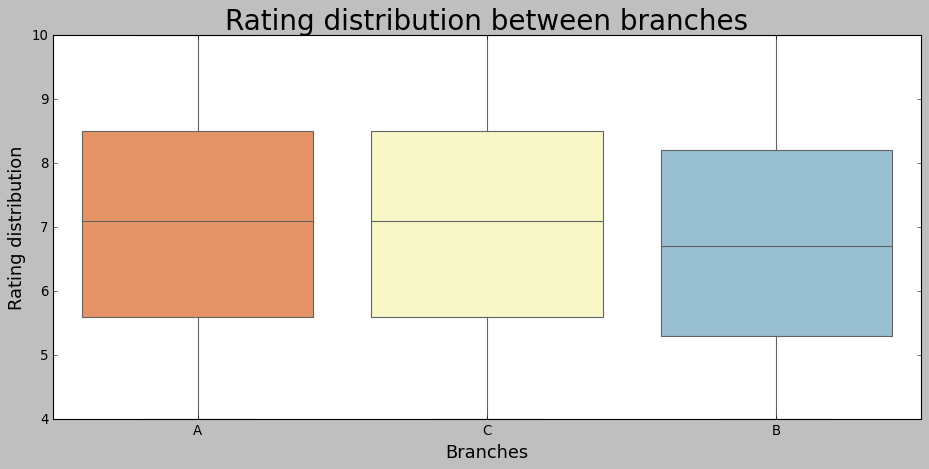

In [31]:
plt.figure(figsize=(14,6))
ax = sns.boxplot(x='Branch', y = 'Rating', data=df, palette='RdYlBu')
ax.set_title('Rating distribution between branches', fontsize=25)
ax.set_xlabel(xlabel = 'Branches', fontsize=16)
ax.set_ylabel(ylabel = 'Rating distribution', fontsize=16)
plt.show()

# Let's check when we sold the most

In [33]:
df.head(3)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4


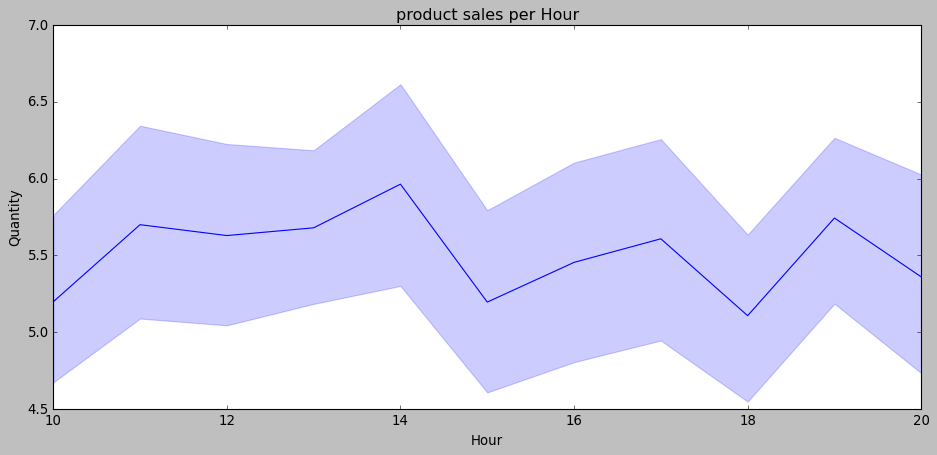

In [34]:
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = (df['Time']).dt.hour
plt.figure(figsize=(14,6))
plt.style.use('classic')
SalesTime = sns.lineplot(x='Hour', y = 'Quantity', data=df).set_title('product sales per Hour')
plt.show()

# from the graph it is clear that we make most of our sales durig the hours of 14:00

### let's check our rating and sales

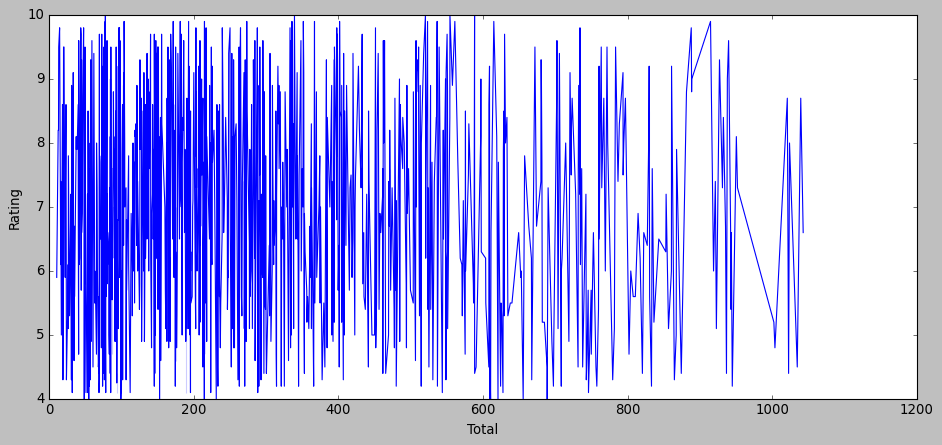

In [35]:
plt.figure(figsize=(14,6))
plt.style.use('classic')
rating_vs_sales = sns.lineplot(x='Total', y='Rating', data=df)
plt.show()

# At this point, let's check the sales of our different products, my most favorite task here.

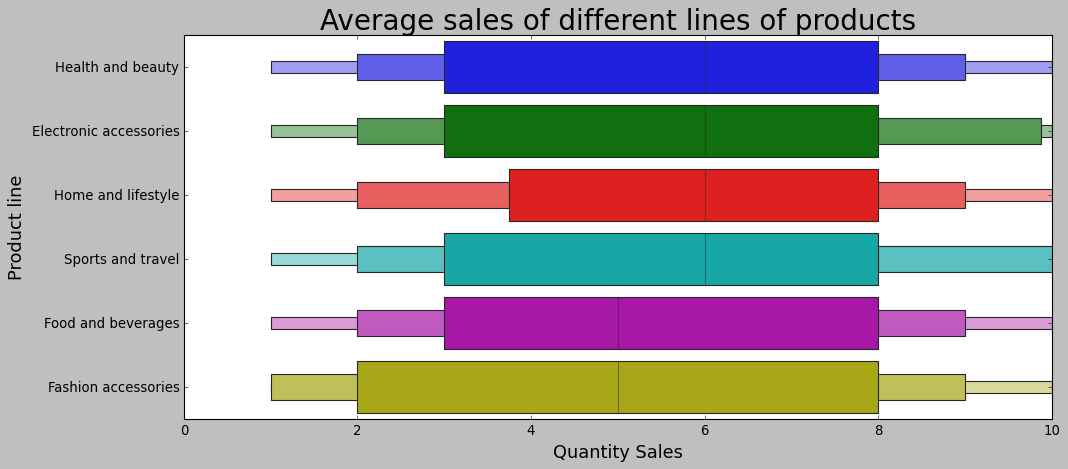

In [37]:
plt.figure(figsize=(14,6))
plt.style.use('classic')
ax = sns.boxenplot(x = 'Quantity', y = 'Product line', data=df)
ax.set_title(label = 'Average sales of different lines of products', fontsize = 25)
ax.set_xlabel(xlabel = 'Quantity Sales', fontsize=16)
ax.set_ylabel(ylabel = 'Product line', fontsize =16)
plt.show()

#### Here we can see that the average sales of different lines of products. Health and beauty making the highest sales whereas Fashon accessories making the lowest sales.

# Sales Count for all products

In [39]:
df.head(2)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour
Invoice ID,,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2021-02-03 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,13
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2021-02-03 10:29:00,Cash,76.40,4.761905,3.8200,9.6,10


/home/tonye/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NameError: name 'sns_title' is not defined

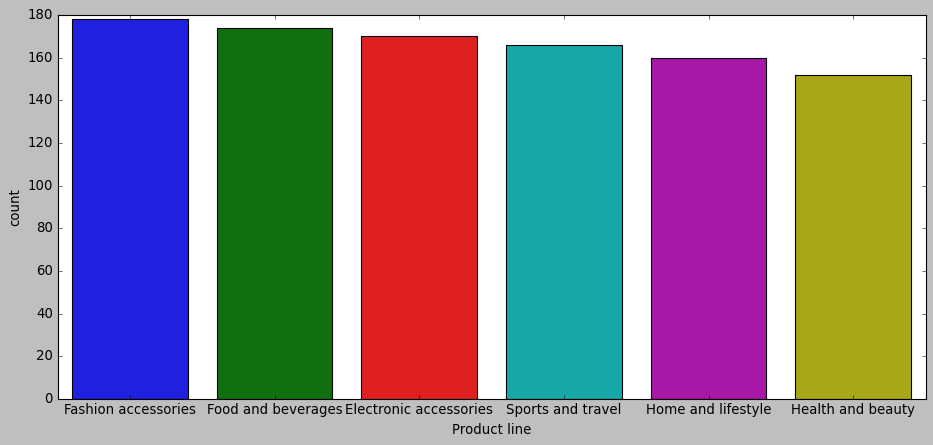

In [41]:
product =df['Product line']
plt.figure(figsize=(14,6))
ax = sns.countplot(product, data=df, order=df['Product line'].value_counts().index)
ax = sns_title(label = 'Sales count of products', fontsize=25)
ax.set_xlabel(xlabel = 'Sales count', fontsize = 16)
ax.set_ylabel(ylabel = 'Product Line', fontsize=16)
plt.show()

## Here we have that the Fashion accessories had higher sales points.

### Total sales of product

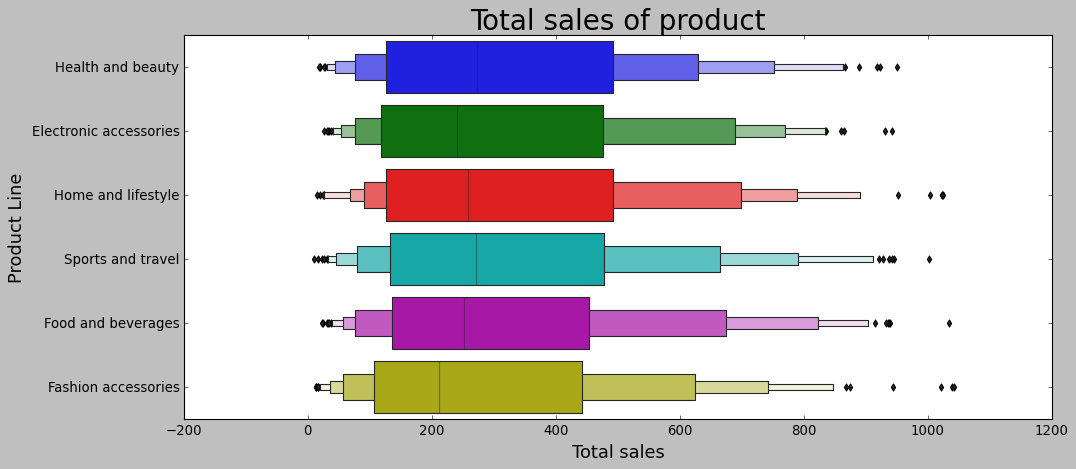

In [43]:
plt.figure(figsize=(14,6))
plt.style.use('classic')
ax = sns.boxenplot(y = 'Product line', x = 'Total', data=df)
ax.set_title(label = 'Total sales of product', fontsize=25)
ax.set_xlabel(xlabel = 'Total sales', fontsize = 16)
ax.set_ylabel(ylabel = 'Product Line', fontsize= 16)
plt.show()

# Let's see the average rating of product

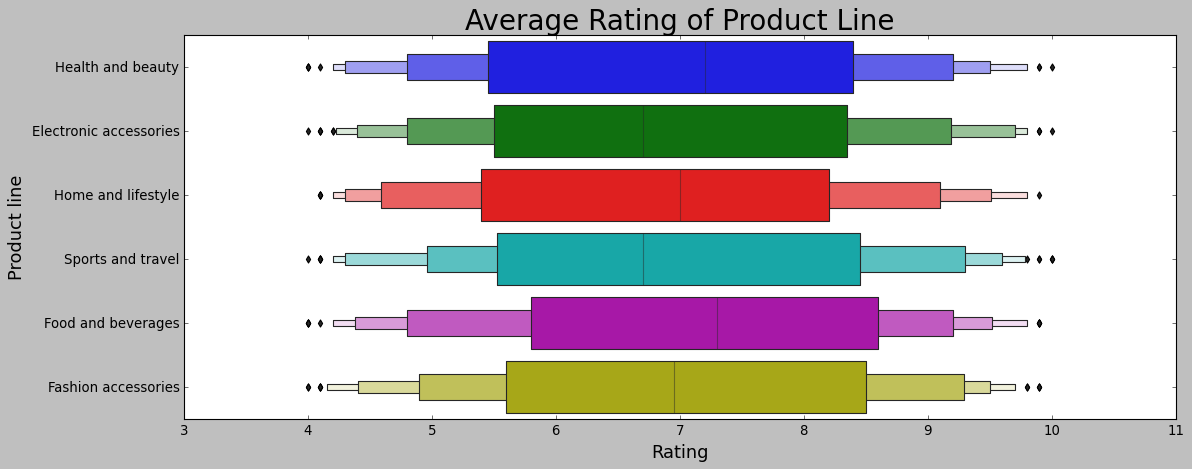

In [45]:
plt.figure(figsize=(16,6))
plt.style.use('classic')
ax = sns.boxenplot(y = 'Product line', x = 'Rating', data=df)
ax.set_title('Average Rating of Product Line', fontsize=25)
ax.set_xlabel('Rating', fontsize = 16)
ax.set_ylabel('Product line', fontsize = 16)
plt.show()

## Product sales on the basic oof gender

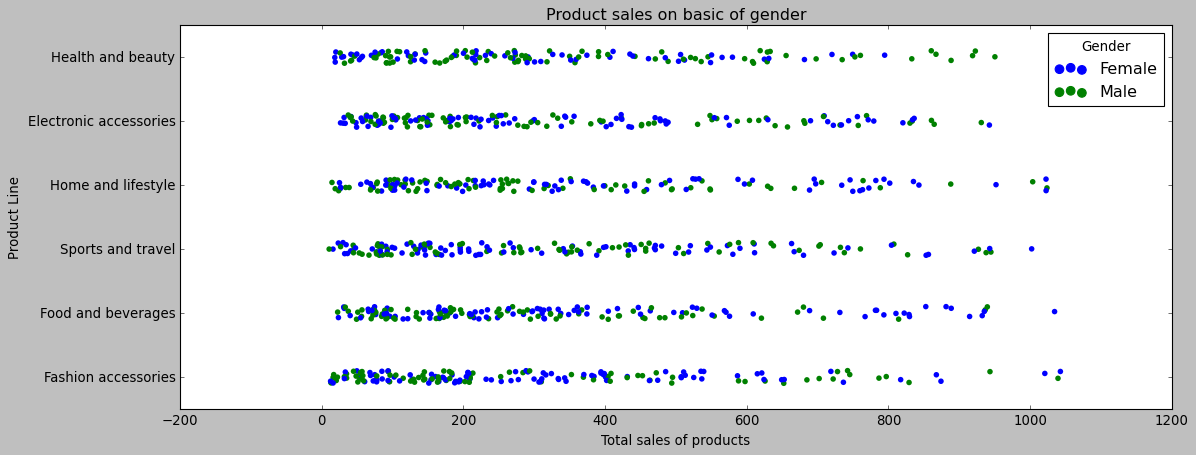

In [46]:
plt.style.use('classic')
plt.figure(figsize=(16,6))
ax = sns.stripplot(y='Product line', x = 'Total', hue='Gender', data=df)
ax.set_title(label = 'Product sales on basic of gender')
ax.set_xlabel(xlabel = 'Total sales of products')
ax.set_ylabel(ylabel = 'Product Line')
plt.show()

In [48]:
df.head(3)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour
Invoice ID,,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2021-02-03 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,13
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2021-02-03 10:29:00,Cash,76.40,4.761905,3.8200,9.6,10
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2021-02-03 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,13


#  product and gross income

/home/tonye/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1120x480 with 0 Axes>

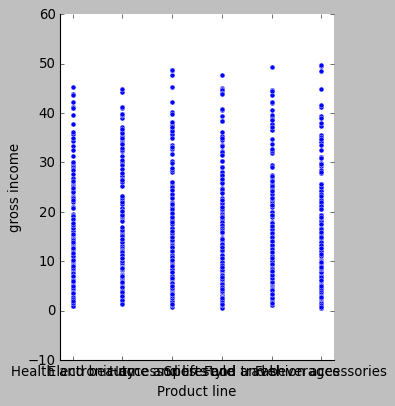

In [56]:
product = df['Product line']
gross = df['gross income']

plt.figure(figsize=(14,6))
plt.style.use('classic')
ax = sns.relplot(product, gross, data=df)
plt.show()